In [24]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn

!pip install graphviz

!pip install xlrd
!pip install openpyxl

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [50]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [51]:
df = pd.read_csv(path)

In [52]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,0,1,5433,0,0,1,None,0,0.00,0,...,90022,34.023810,-118.156582,Male,78,0,1,0,0,0
1,1,1,5302,1,1,8,Offer E,1,48.85,1,...,90063,34.044271,-118.185237,Female,74,0,1,1,1,1
2,2,1,3179,0,0,18,Offer D,1,11.33,1,...,90065,34.108833,-118.229715,Male,71,0,1,0,1,3
3,3,1,5337,1,1,25,Offer C,1,19.76,0,...,90303,33.936291,-118.332639,Female,78,0,1,1,1,1
4,4,1,2793,1,1,37,Offer C,1,6.33,1,...,90602,33.972119,-118.020188,Female,80,0,1,1,1,1


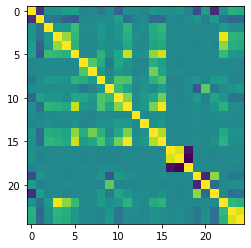

In [53]:
plt.imshow(df.corr())

In [54]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [57]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,1,5433,0,0,1,0,0,0.00,0,1,...,90022,34.023810,-118.156582,1,78,0,1,0,0,0
1,1,5302,1,1,8,5,1,48.85,1,1,...,90063,34.044271,-118.185237,0,74,0,1,1,1,1
2,1,3179,0,0,18,4,1,11.33,1,1,...,90065,34.108833,-118.229715,1,71,0,1,0,1,3
3,1,5337,1,1,25,3,1,19.76,0,1,...,90303,33.936291,-118.332639,0,78,0,1,1,1,1
4,1,2793,1,1,37,3,1,6.33,1,1,...,90602,33.972119,-118.020188,0,80,0,1,1,1,1


In [58]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.1, train_size=None, random_state=None, shuffle=True, stratify=None)

In [59]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
6949,5921,1,2,48,2,1,36.18,0,1,2,...,91791,34.061634,-117.893169,0,53,0,0,1,1,2
2250,5948,0,0,3,5,1,47.51,1,1,2,...,93224,35.215731,-119.570130,0,30,0,0,0,0,0
1817,4154,0,0,1,0,1,22.86,0,1,2,...,90631,33.940619,-117.951300,1,50,0,0,0,0,0
1581,2856,0,0,2,5,1,33.89,0,1,2,...,92543,33.739415,-116.968339,0,29,1,0,0,0,0
2871,5213,0,0,2,0,1,37.70,0,1,2,...,92606,33.703976,-117.824172,1,25,1,0,0,0,0


#### Linear regression - Baseline

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
reg = LinearRegression().fit(training_features, training_target)

In [62]:
reg.score(testing_features, testing_target)

0.28360025648783094

#### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(training_features, training_target)

DecisionTreeRegressor(max_depth=3)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
pred = model.predict(testing_features)
print(testing_target.shape)
pred = np.where(pred < 0.5, 0, 1)
print(pred.shape)

(705,)
(705,)


In [66]:
accuracy_score(testing_target, pred)

0.7872340425531915

In [67]:
import graphviz
from sklearn import tree

In [68]:
dot_data = tree.export_graphviz(model, feature_names = list(training_features), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 

In [69]:
graph.render(view=True)

'Source.gv.pdf'